In [10]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [17]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [11]:
#remove NAN
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [21]:
dataset = dataset[[
    'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
dataset.shape

(974, 64)

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 2 to 1019
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ICU_mortality        974 non-null    int64  
 1   LOS_Group            974 non-null    object 
 2   trauma               974 non-null    int64  
 3   metabolic            974 non-null    int64  
 4   gastrointestinal     974 non-null    int64  
 5   Sepsis               974 non-null    int64  
 6   age                  974 non-null    object 
 7   gender               974 non-null    object 
 8   weight               974 non-null    float64
 9   BMI                  974 non-null    float64
 10  active problems      974 non-null    object 
 11  background problems  974 non-null    object 
 12  feeding              974 non-null    object 
 13  Target_pro_day       974 non-null    float64
 14  pro_to_target_day0   974 non-null    float64
 15  pro_to_target_day1   974 non-null    fl

In [14]:
dataset.ICU_mortality.value_counts()

0    741
1    235
Name: ICU_mortality, dtype: int64

In [22]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,5606
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(974, 64)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7577,0.5907,0.0610,0.4900,0.1046,0.0559,0.1019,0.0860
et,Extra Trees Classifier,0.7489,0.6089,0.0732,0.3600,0.1195,0.0503,0.0743,0.0810
lr,Logistic Regression,0.7415,0.5882,0.1393,0.3904,0.2042,0.0922,0.1096,0.4040
ridge,Ridge Classifier,0.7371,0.0000,0.1088,0.3558,0.1649,0.0596,0.0757,0.0090
ada,Ada Boost Classifier,0.7371,0.6034,0.1879,0.4302,0.2543,0.1216,0.1418,0.0480
gbc,Gradient Boosting Classifier,0.7357,0.5847,0.0971,0.3048,0.1440,0.0439,0.0500,0.1180
knn,K Neighbors Classifier,0.7195,0.5124,0.0971,0.2542,0.1388,0.0174,0.0176,0.0140
lightgbm,Light Gradient Boosting Machine,0.7166,0.5839,0.1331,0.3058,0.1814,0.0427,0.0495,0.0380
lda,Linear Discriminant Analysis,0.7078,0.5901,0.1684,0.3238,0.2169,0.0576,0.0656,0.0090
dt,Decision Tree Classifier,0.6740,0.5396,0.2801,0.2938,0.2850,0.0762,0.0761,0.0100


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5606, verbose=0,
                       warm_start=False)


In [24]:
#for more info: https://pycaret.org/tune-model/
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7161,0.6471,0.3929,0.4889,0.2629,0.2809
1,0.3382,0.5634,0.7647,0.2407,0.3662,-0.0227,-0.0420
2,0.6912,0.5957,0.4118,0.3889,0.4000,0.1923,0.1925
3,0.5147,0.7399,0.8824,0.3261,0.4762,0.1750,0.2541
4,0.4853,0.4243,0.1875,0.1200,0.1463,-0.1972,-0.2072
5,0.6029,0.5282,0.3750,0.2609,0.3077,0.0418,0.0431
6,0.5735,0.5451,0.3750,0.2400,0.2927,0.0080,0.0085
7,0.3235,0.5072,0.6250,0.2000,0.3030,-0.0831,-0.1387
8,0.3088,0.6370,0.8750,0.2373,0.3733,0.0050,0.0120
9,0.5147,0.3960,0.1250,0.0952,0.1081,-0.2169,-0.2207


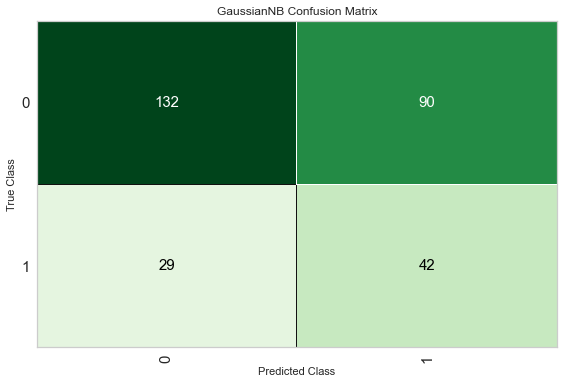

In [25]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# best slice (groups that orit told us to explore)

In [4]:
dataset_en = dataset[['ICU_mortality','age','BMI','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0','EN_pro_day1','EN_pro_day2','EN_pro_day3','EN_pro_day4','EN_pro_day5']]
print(dataset_en.shape)

(976, 13)


In [5]:

data = dataset_en.sample(frac=0.8, random_state=71)
data_unseen = dataset_en.drop(data.index)

In [7]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,2352
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(781, 13)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
#for more info: https://pycaret.org/tune-model/
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7091,0.6742,0.4286,0.4286,0.4286,0.2334,0.2334
1,0.7091,0.6533,0.2143,0.3750,0.2727,0.1075,0.1141
2,0.7273,0.6899,0.2857,0.4444,0.3478,0.1856,0.1928
3,0.7273,0.6185,0.3571,0.4545,0.4000,0.2268,0.2296
4,0.7273,0.6167,0.2857,0.4444,0.3478,0.1856,0.1928
5,0.6364,0.4286,0.1429,0.2000,0.1667,-0.0577,-0.0590
6,0.6296,0.3677,0.0769,0.1111,0.0909,-0.1321,-0.1356
7,0.6852,0.5946,0.2857,0.3636,0.3200,0.1190,0.1205
8,0.7407,0.6696,0.2143,0.5000,0.3000,0.1711,0.1942
9,0.7037,0.6804,0.5000,0.4375,0.4667,0.2628,0.2639


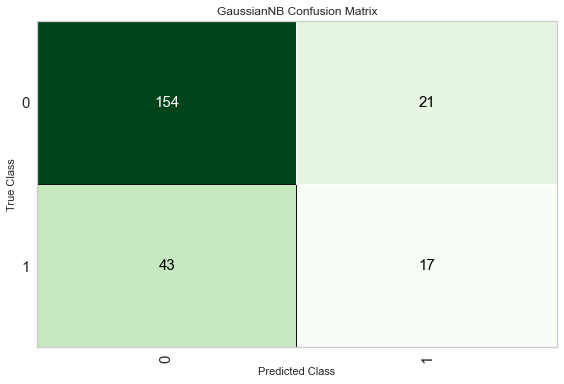

In [9]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# feater importance

In [29]:
X = dataset[[   
'ICU_mortality',
'trauma',
'gastrointestinal',
'pro_to_target_day3'
,'pro_to_target_day13'
# ,'Total_EN_pro'
,'Total_PN_pro'
#,'EN_pro_day1'
#,'EN_pro_day2'
,'PN_pro_day3'
,'PN_pro_day4'
,'PN_pro_day5'
,'PN_pro_day6'
,'PN_pro_day7'
,'PN_pro_day8'
,'PN_pro_day9'

 ]]
print(X.shape)

(974, 13)


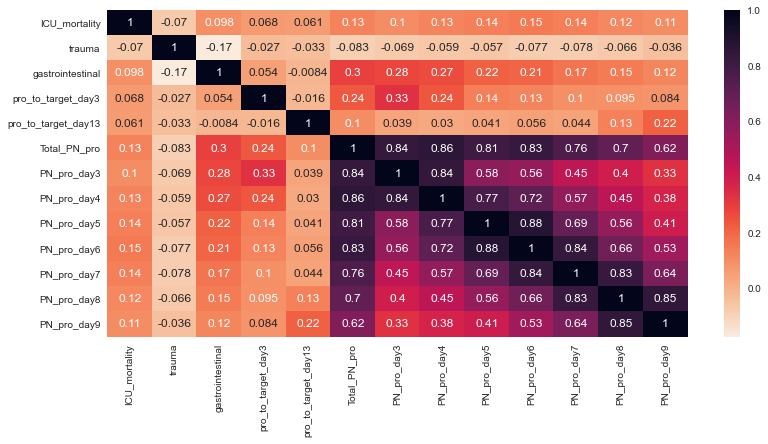

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,6))
sns.heatmap(X.corr(), annot=True, cmap='rocket_r')

plt.show()

In [38]:

data = X.sample(frac=0.8, random_state=71)
data_unseen = X.drop(data.index)

In [39]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True,normalize=True)

,Description,Value
0,session_id,5565
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(779, 13)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7570,0.5375,0.1081,0.6033,0.1747,0.0987,0.1595,0.0300
lr,Logistic Regression,0.7537,0.5770,0.0471,0.3583,0.0803,0.0363,0.0681,0.0480
ridge,Ridge Classifier,0.7537,0.0000,0.0471,0.3583,0.0803,0.0363,0.0681,0.0060
lda,Linear Discriminant Analysis,0.7504,0.5768,0.0676,0.3950,0.1124,0.0497,0.0840,0.0060
nb,Naive Bayes,0.7389,0.5871,0.1762,0.4074,0.2409,0.1168,0.1324,0.0060
gbc,Gradient Boosting Classifier,0.7357,0.5030,0.0881,0.2727,0.1301,0.0379,0.0437,0.0390
qda,Quadratic Discriminant Analysis,0.7341,0.5691,0.1629,0.3986,0.2264,0.0986,0.1155,0.0070
svm,SVM - Linear Kernel,0.7340,0.0000,0.2305,0.5221,0.2814,0.1505,0.1848,0.0060
knn,K Neighbors Classifier,0.7211,0.5370,0.1552,0.3360,0.2093,0.0686,0.0768,0.3010
lightgbm,Light Gradient Boosting Machine,0.7081,0.5218,0.1014,0.2533,0.1423,0.0043,0.0063,0.0220


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4612)


In [40]:
#for more info: https://pycaret.org/tune-model/
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7273,0.6394,0.2143,0.4286,0.2857,0.1397,0.1526
1,0.2364,0.5383,0.9286,0.2407,0.3824,-0.0368,-0.2329
2,0.7636,0.7300,0.2857,0.5714,0.3810,0.2544,0.2778
3,0.7818,0.5157,0.1429,1.0000,0.2500,0.1990,0.3324
4,0.7273,0.6690,0.3571,0.4545,0.4000,0.2268,0.2296
5,0.6852,0.5469,0.0769,0.1667,0.1053,-0.0552,-0.0613
6,0.7593,0.6923,0.1538,0.5000,0.2353,0.1376,0.1715
7,0.7778,0.4644,0.3846,0.5556,0.4545,0.3208,0.3293
8,0.7222,0.6942,0.3077,0.4000,0.3478,0.1752,0.1776
9,0.7407,0.6339,0.2143,0.5000,0.3000,0.1711,0.1942


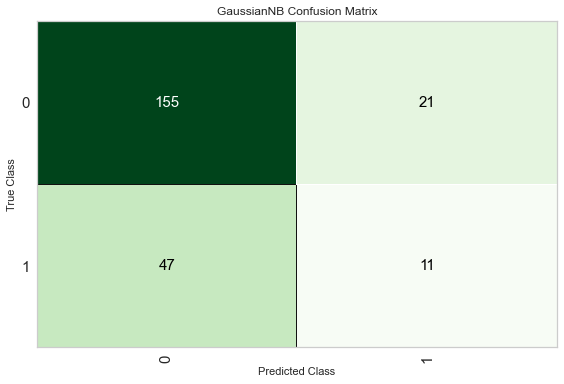

In [41]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# less feater fro feater importance

In [47]:
X1 = dataset[[   
'ICU_mortality',
'Total_PN_pro'
,'PN_pro_day3'
,'PN_pro_day4'
,'PN_pro_day5'
,'PN_pro_day6'
,'PN_pro_day7'
,'PN_pro_day8'
,'PN_pro_day9'

 ]]
print(X.shape)

(974, 13)


In [48]:

data = X1.sample(frac=0.8, random_state=71)
data_unseen = X1.drop(data.index)
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True,normalize=True)
#for more info: https://pycaret.org/tune-model/
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7273,0.5645,0.2143,0.4286,0.2857,0.1397,0.1526
1,0.7636,0.5941,0.2857,0.5714,0.3810,0.2544,0.2778
2,0.7455,0.6533,0.3571,0.5000,0.4167,0.2596,0.2656
3,0.7636,0.5723,0.2857,0.5714,0.3810,0.2544,0.2778
4,0.6909,0.5497,0.2143,0.3333,0.2609,0.0770,0.0800
5,0.6852,0.4390,0.0000,0.0000,0.0000,-0.1278,-0.1593
6,0.7593,0.6135,0.1538,0.5000,0.2353,0.1376,0.1715
7,0.8148,0.6538,0.2308,1.0000,0.3750,0.3130,0.4307
8,0.7222,0.5366,0.2308,0.3750,0.2857,0.1253,0.1310
9,0.7037,0.6098,0.1429,0.3333,0.2000,0.0526,0.0598


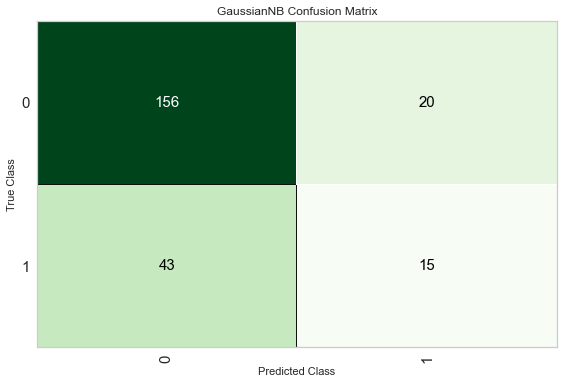

In [49]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [50]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7597,0.5804,0.1610,0.5671,0.2447,0.1548,0.1991,0.0710
ada,Ada Boost Classifier,0.7597,0.5632,0.1390,0.6042,0.2180,0.1399,0.2007,0.0300
et,Extra Trees Classifier,0.7486,0.5773,0.1456,0.4488,0.2134,0.1187,0.1425,0.0590
qda,Quadratic Discriminant Analysis,0.7469,0.5696,0.2192,0.5545,0.2902,0.1709,0.2091,0.0170
lightgbm,Light Gradient Boosting Machine,0.7451,0.5388,0.1181,0.4900,0.1854,0.0968,0.1400,0.0220
dt,Decision Tree Classifier,0.7415,0.5128,0.1538,0.4361,0.2167,0.1126,0.1349,0.0070
gbc,Gradient Boosting Classifier,0.7414,0.5378,0.1319,0.5055,0.1945,0.0967,0.1329,0.0240
nb,Naive Bayes,0.7376,0.5787,0.2115,0.4613,0.2821,0.1486,0.1687,0.0060
ridge,Ridge Classifier,0.7339,0.0000,0.0291,0.2167,0.0503,-0.0029,0.0011,0.0140
lr,Logistic Regression,0.7321,0.5374,0.0291,0.2167,0.0503,-0.0058,-0.0011,0.0170


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4414, verbose=0,
                       warm_start=False)


In [51]:
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7455,0.0000,0.2143,0.5000,0.3000,0.1738,0.1972
1,0.2182,0.0000,0.7857,0.2157,0.3385,-0.1015,-0.3185
2,0.6909,0.0000,0.3571,0.3846,0.3704,0.1659,0.1661
3,0.7273,0.0000,0.2857,0.4444,0.3478,0.1856,0.1928
4,0.7091,0.0000,0.2857,0.4000,0.3333,0.1538,0.1574
5,0.3704,0.0000,1.0000,0.2766,0.4333,0.0902,0.2173
6,0.2407,0.0000,0.7692,0.2083,0.3279,-0.0821,-0.2144
7,0.1852,0.0000,0.7692,0.1961,0.3125,-0.1155,-0.4307
8,0.2593,0.0000,0.6923,0.2000,0.3103,-0.1009,-0.2131
9,0.2963,0.0000,0.8571,0.2500,0.3871,-0.0240,-0.0598


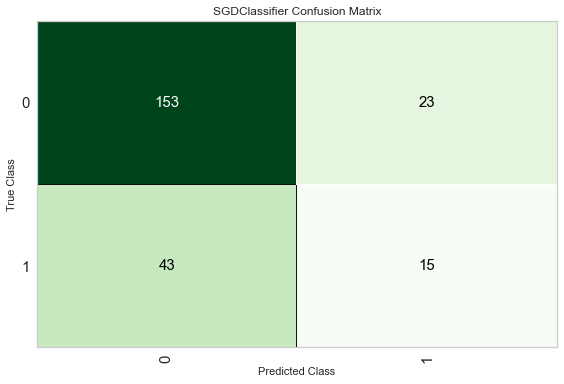

In [52]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# NN

In [53]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X.iloc[:,1:], X.ICU_mortality, epochs=150, batch_size=10)


Epoch 1/150
98/98 [==============================] - 0s 726us/step - loss: 10.1355 - accuracy: 0.3186
Epoch 2/150
98/98 [==============================] - 0s 850us/step - loss: 2.9349 - accuracy: 0.6814
Epoch 3/150
98/98 [==============================] - 0s 932us/step - loss: 1.3482 - accuracy: 0.7326
Epoch 4/150
98/98 [==============================] - 0s 856us/step - loss: 1.0029 - accuracy: 0.7346
Epoch 5/150
98/98 [==============================] - 0s 938us/step - loss: 0.8878 - accuracy: 0.7387
Epoch 6/150
98/98 [==============================] - 0s 1ms/step - loss: 0.8209 - accuracy: 0.7449
Epoch 7/150
98/98 [==============================] - 0s 1ms/step - loss: 0.7622 - accuracy: 0.7387
Epoch 8/150
98/98 [==============================] - 0s 980us/step - loss: 0.7105 - accuracy: 0.7428
Epoch 9/150
98/98 [==============================] - 0s 962us/step - loss: 0.6904 - accuracy: 0.7346
Epoch 10/150
98/98 [==============================] - 0s 836us/step - loss: 0.6867 - accuracy:

In [56]:
_, accuracy = model.evaluate(X.iloc[:,1:], X.ICU_mortality)
print('Accuracy: %.2f' % (accuracy*100))

31/31 [==============================] - 0s 893us/step - loss: 0.5055 - accuracy: 0.7715
Accuracy: 77.15
